**Imports and workspace setting**

In [325]:
import csv
import math
import os

import numpy as np
import pandas as pd

import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
%matplotlib inline

import scipy.stats as stat

**Loading data and preview**

In [326]:
my_data = pd.read_csv('PSID.csv')
my_data.head()

,Seq No,intnum,persnum,age,educatn,earnings,hours,kids,married
0,1,4,4,39,12.0,77250,2940,2,married
1,2,4,6,35,12.0,12000,2040,2,divorced
2,3,4,7,33,12.0,8000,693,1,married
3,4,4,173,39,10.0,15000,1904,2,married
4,5,5,2,47,9.0,6500,1683,5,married


**Describing data set**

In [327]:
print('Data set size = ', my_data.shape)
print('Dimension = ', my_data.ndim)

Data set size =  (4856, 9)
Dimension =  2


In [328]:
my_data.dtypes

Seq No        int64
intnum        int64
persnum       int64
age           int64
educatn     float64
earnings      int64
hours         int64
kids          int64
married      object
dtype: object

In [329]:
my_data.describe()

,Seq No,intnum,persnum,age,educatn,earnings,hours,kids
count,4856.000000,4856.000000,4856.000000,4856.000000,4855.000000,4856.000000,4856.000000,4856.000000
mean,2428.500000,4598.101318,59.213550,38.462932,16.377137,14244.506178,1235.334843,4.481260
std,1401.950784,2761.971174,79.748556,5.595116,18.449502,15985.447449,947.175837,14.887856
min,1.000000,4.000000,1.000000,30.000000,0.000000,0.000000,0.000000,0.000000
25%,1214.750000,1905.000000,2.000000,34.000000,12.000000,85.000000,32.000000,1.000000
50%,2428.500000,5464.000000,4.000000,38.000000,12.000000,11000.000000,1517.000000,2.000000
75%,3642.250000,6655.000000,170.000000,43.000000,14.000000,22000.000000,2000.000000,3.000000
max,4856.000000,9306.000000,205.000000,50.000000,99.000000,240000.000000,5160.000000,99.000000


Text(0.5, 0, 'Education level')

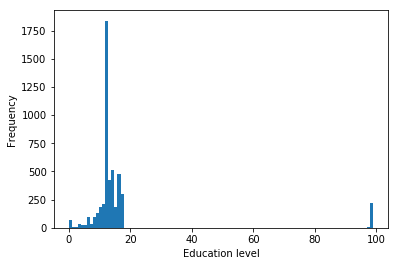

In [330]:
my_data['educatn'].plot(kind='hist', bins=100)
plt.xlabel('Education level')

Text(0.5, 0, 'Number of kids')

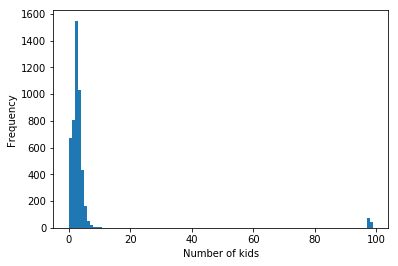

In [331]:
my_data['kids'].plot(kind='hist', bins=100)
plt.xlabel('Number of kids')

Text(0.5, 0, 'Earnings')

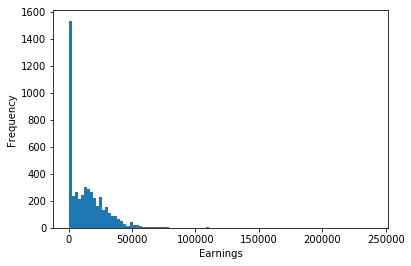

In [332]:
my_data['earnings'].plot(kind='hist', bins=100)
plt.xlabel('Earnings')

Text(0.5, 0, 'Hours')

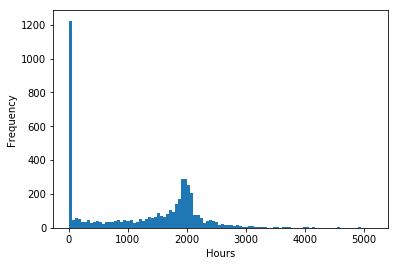

In [333]:
my_data['hours'].plot(kind='hist', bins=100)
plt.xlabel('Hours')

**Remove invalid data (limiting kids <=20 and education <= 20 and earnings >= 150000 and nan values)**

Text(0.5, 0, 'Education level')

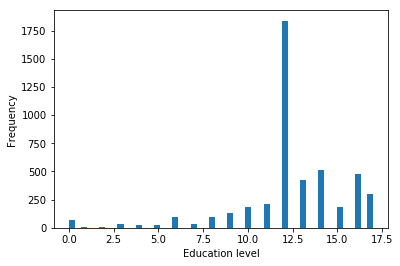

In [334]:
my_data = my_data.dropna(how='any')
my_data = my_data.drop(my_data[my_data.educatn > 20].index)
my_data['educatn'].plot(kind='hist', bins=50)
plt.xlabel('Education level')

In [335]:
my_data.shape

(4630, 9)

Text(0.5, 0, 'Number of kids')

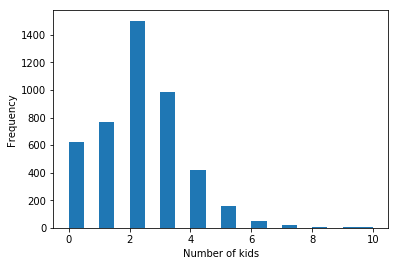

In [336]:
my_data = my_data.drop(my_data[my_data.kids > 20].index)
my_data['kids'].plot(kind='hist', bins=20)
plt.xlabel('Number of kids')

In [337]:
my_data.shape

(4528, 9)

Text(0.5, 0, 'earnings')

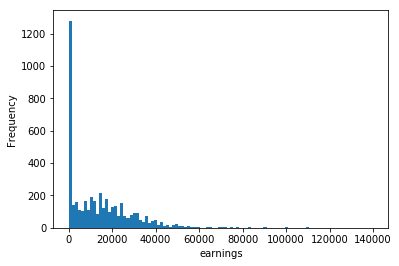

In [338]:
my_data = my_data.drop(my_data[my_data.earnings > 150000].index)
my_data['earnings'].plot(kind='hist', bins=100)
plt.xlabel('earnings')

**Identifying indenpendent and dependent variables**

Text(0, 0.5, 'Hours')

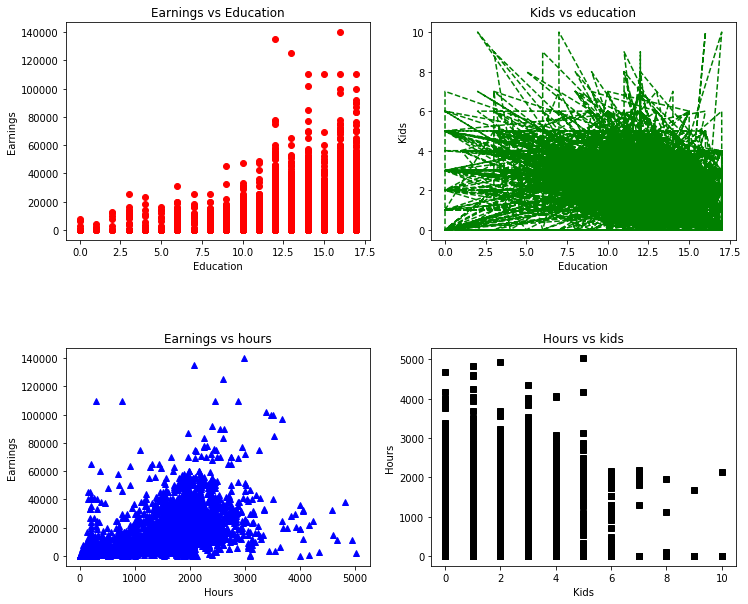

In [339]:
plt.figure(figsize=(12, 10))
plt.subplots_adjust(hspace=0.5)
plt.subplot(2,2,1)
plt.plot(my_data['educatn'], my_data['earnings'], 'ro')
plt.title('Earnings vs Education')
plt.xlabel("Education")
plt.ylabel("Earnings")

plt.subplot(2,2,2)
plt.plot(my_data['educatn'], my_data['kids'], 'g--')
plt.title('Kids vs education')
plt.xlabel("Education")
plt.ylabel("Kids")

plt.subplot(2,2,3)
plt.plot(my_data['hours'], my_data['earnings'], 'b^')
plt.title('Earnings vs hours')
plt.xlabel("Hours")
plt.ylabel("Earnings")

plt.subplot(2,2,4)
plt.plot(my_data['kids'], my_data['hours'], 'ks')
plt.title('Hours vs kids')
plt.xlabel("Kids")
plt.ylabel("Hours")

**Identifying correlation between the variables using Pearson's correlation coefficient**

In [340]:
my_data.corr(method='pearson')

,Seq No,intnum,persnum,age,educatn,earnings,hours,kids
Seq No,1.000000,0.984724,-0.271634,-0.019025,-0.346179,-0.186149,-0.121043,0.147978
intnum,0.984724,1.000000,-0.267248,-0.031421,-0.343156,-0.187234,-0.119113,0.149591
persnum,-0.271634,-0.267248,1.000000,-0.087064,0.131956,0.060532,0.034482,-0.072943
age,-0.019025,-0.031421,-0.087064,1.000000,-0.022099,0.100284,0.057304,0.145130
educatn,-0.346179,-0.343156,0.131956,-0.022099,1.000000,0.388051,0.236073,-0.270622
earnings,-0.186149,-0.187234,0.060532,0.100284,0.388051,1.000000,0.652363,-0.257581
hours,-0.121043,-0.119113,0.034482,0.057304,0.236073,0.652363,1.000000,-0.189524
kids,0.147978,0.149591,-0.072943,0.145130,-0.270622,-0.257581,-0.189524,1.000000


### It can be observed that there is a high(=0.652363) correlation between "earnings" and "hours"

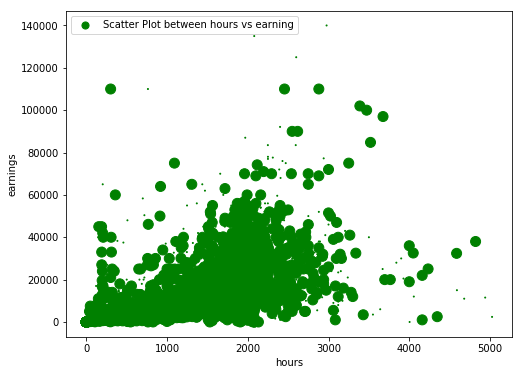

In [341]:
ax = my_data.plot.scatter(x='hours', y='earnings', s=[1,100], c='green', figsize=(8, 6), label='Scatter Plot between hours vs earning')

**Extracting 2 random and equal size samples without replacement**

In [342]:
samplingSize = 1000
hypothesisEarningVal = my_data.earnings.median()
print(hypothesisEarningVal)

highSalaryWorkingHours = my_data[my_data.earnings> hypothesisEarningVal].hours
print("High Salary people count =", highSalaryWorkingHours.count())

lowSalaryWorkingHours = my_data[my_data.earnings<= hypothesisEarningVal].hours
print("Low Salary people count =", lowSalaryWorkingHours.count())

11234.0
High Salary people count = 2262
Low Salary people count = 2263


In [343]:
Hours_of_high_salary = my_data[my_data.earnings> hypothesisEarningVal].hours.sample(samplingSize).sort_values()
Hours_of_high_salary.describe()

count    1000.000000
mean     1912.954000
std       512.362924
min       122.000000
25%      1751.500000
50%      1960.000000
75%      2080.000000
max      4821.000000
Name: hours, dtype: float64

In [344]:
Hours_of_low_salary = my_data[my_data.earnings<= hypothesisEarningVal].hours.sample(samplingSize).sort_values()
Hours_of_low_salary.describe()

count    1000.000000
mean      636.910000
std       799.438331
min         0.000000
25%         0.000000
50%       194.000000
75%      1186.750000
max      4680.000000
Name: hours, dtype: float64

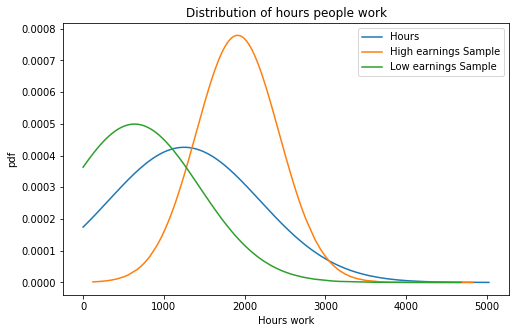

In [345]:
Population = my_data['hours'].sort_values();
PopulationHours = stat.norm.pdf(Population, Population.mean(), Population.std())
fig, ax = plt.subplots(figsize=(8,5))

ax.plot(Population, PopulationHours, label='Hours')

hour_data_fit1 = stat.norm.pdf(Hours_of_high_salary, Hours_of_high_salary.mean(), Hours_of_high_salary.std())
ax.plot(Hours_of_high_salary, hour_data_fit1, label='High earnings Sample')

hour_data_fit2 = stat.norm.pdf(Hours_of_low_salary, Hours_of_low_salary.mean(), Hours_of_low_salary.std())
ax.plot(Hours_of_low_salary, hour_data_fit2, label='Low earnings Sample')

plt.title('Distribution of hours people work')
plt.xlabel('Hours work')
plt.ylabel('pdf')
plt.legend()

**Hypothesis testing : 
Ha = People who earn high salary work more hours,
H0 = People with high or low salaries work the same number of hours**

In [346]:
statistics, p = stat.ttest_ind(Hours_of_high_salary, Hours_of_low_salary)
print('Statistics=%.3f, p=%.3f' % (statistics, p))
# interpret
alpha = 0.05  # 5% area under the normal graph
if p > alpha:
	print('People with different salaries work same number of hours (fail to reject H0)')
else:
	print('People who get high salary work more hours (reject H0)')

Statistics=42.497, p=0.000
People who get high salary work more hours (reject H0)
